In [1]:
import pandas as pd 

In [112]:
data = pd.read_csv("/Users/zhangjinwei/Desktop/wanweishuju.csv",header=0)
data

,Unnamed: 0,挥发分,羟基含量(%),熔融指数,堆积密度,游离酸,粘 度,乙酰,缩丁醛基
0,2,0.9,18.0,1.45,0.196,0.0022,209,1.92,77.2
1,3,1.2,17.9,1.40,0.195,0.0022,206,1.95,77.4
2,4,0.9,17.9,1.45,0.194,0.0022,202,2.01,77.5
3,5,0.8,17.8,1.46,0.195,0.0027,203,2.00,77.4
4,6,0.8,18.0,1.49,0.195,0.0022,211,1.96,77.4
...,...,...,...,...,...,...,...,...,...
475,477,0.8,18.2,1.48,0.206,0.0022,218,1.82,76.9
476,478,0.9,18.3,1.57,0.215,0.0022,212,1.85,77.0
477,479,1.0,18.2,1.65,0.207,0.0027,212,1.85,76.9
478,480,0.8,18.5,1.45,0.214,0.0022,223,1.83,76.9


In [116]:

from statsmodels.tsa.stattools import adfuller
import pandas as pd
adf_result1 = adfuller(data["羟基含量(%)"])
print(adf_result1)


(-4.00564656717199, 0.0013812310748267313, 2, 477, {'1%': -3.444133731419755, '5%': -2.8676183066831036, '10%': -2.5700075029117166}, -546.1804734360718)


In [120]:
from statsmodels.tsa.stattools import kpss
adf_result1 = (data["羟基含量(%)"]- ((data["羟基含量(%)"]).mean()))

#define KPSS
def kpss_test(timeseries):
    kpss_test = kpss(timeseries)
    kpss_output = pd.Series(kpss_test[:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpss_test[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)
    
kpss_test(adf_result1)

Test Statistic            0.458453
p-value                   0.051960
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [103]:
a_array = data["羟基含量(%)"]

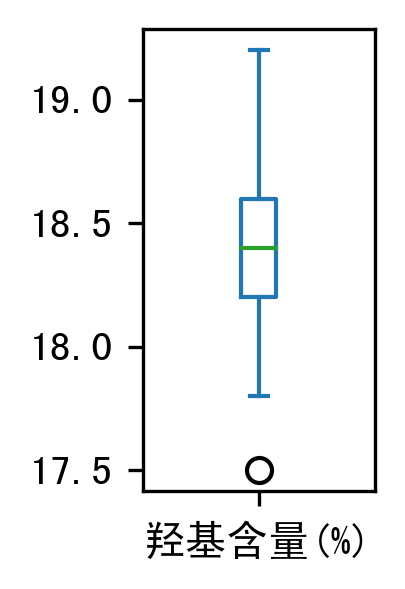

In [104]:
plt.figure(figsize=(1, 2), dpi =300 )
a_array.plot(kind='box', subplots=True, layout= (3,2), sharex=False)
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1693c1580>,
 'caps': [<matplotlib.lines.Line2D at 0x1693c1b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1693c1310>],
 'medians': [<matplotlib.lines.Line2D at 0x1693cf100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1693cf3d0>],
 'means': []}

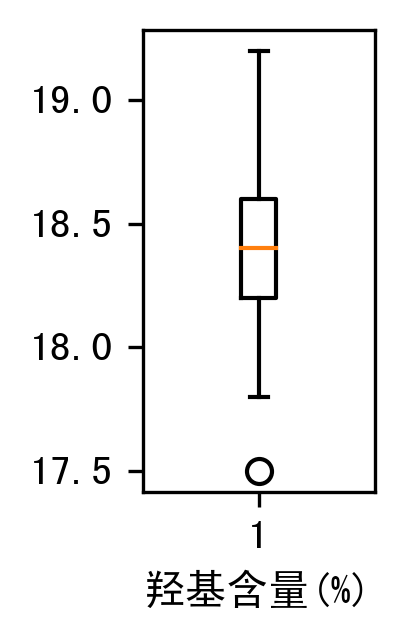

In [89]:
a_array = data["羟基含量"]
plt.figure(figsize=(1, 2), dpi =300 )
plt.xlabel("羟基含量(%)")
plt.boxplot(a_array)

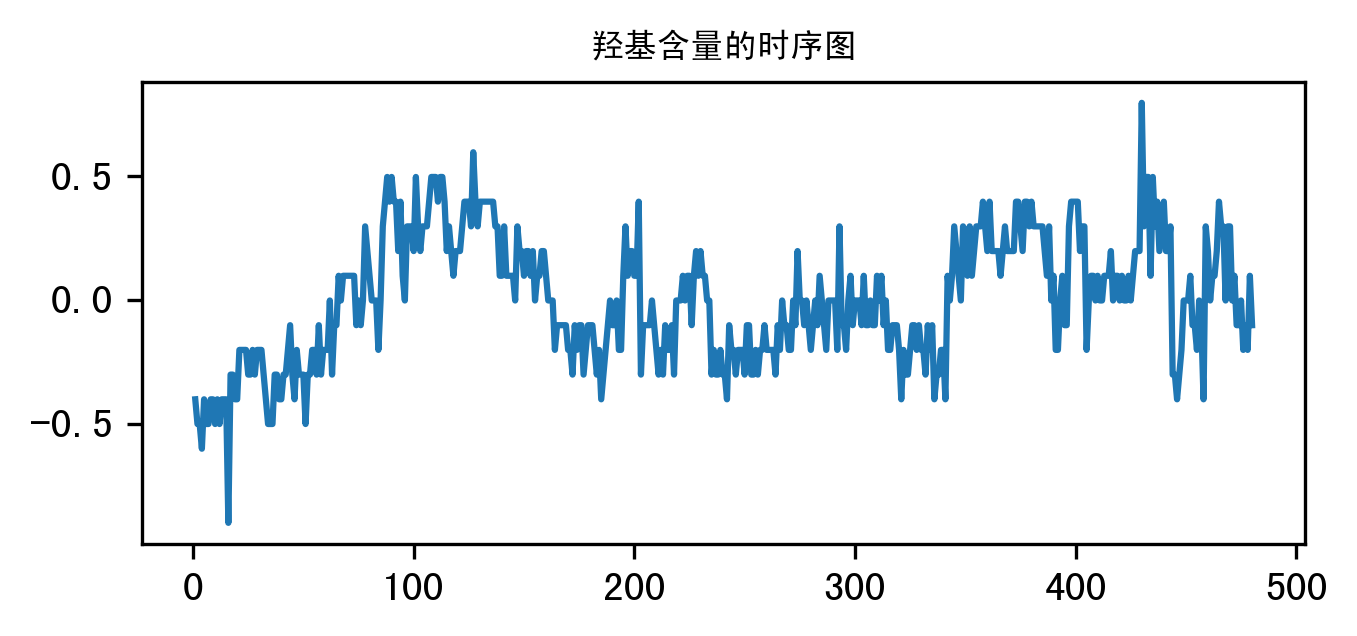

In [74]:
# 绘制时序图
import matplotlib.pyplot as plt
# 用来正常显示中文标签 
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号 
plt.rcParams['axes.unicode_minus']=False

# 绘制条形图
plt.figure(figsize=(5, 2), dpi =300 )
a_array = data["羟基含量"]- ((data["羟基含量"]).mean())
plt.plot(range(1, len(a_array) + 1), a_array)
plt.title('羟基含量的时序图',fontsize=8)#标题，并设定字号大小
plt.show()

In [67]:
# 绘制折线图
from pyecharts.charts import Line 
from pyecharts import options as opts 
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType 
x = (range(1, len(a_array) + 1))
y1  =( data["羟基含量"]- ((data["羟基含量"]).mean()) )
y2 = ( 15, 6, 45, 20, 35, 66 )
y3 = ( 17, 8, 40, 26, 36, 66 )
line = (
    Line(init_opts=opts.InitOpts (theme= ThemeType.WHITE, bg_color="white",width="900px", height="400px")) 
    .add_xaxis(x) 
    .add_yaxis("羟基含量(%)", y1, is_smooth=True,     label_opts=opts.LabelOpts(is_show=False),  # 此处可通过设置 is_smooth=True 使得 线段平滑
               linestyle_opts=opts.LineStyleOpts(  width=2 ),   # 设置线的宽度
              # markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="min")])
               )    # 标记最小值点
    .set_global_opts( title_opts=opts. TitleOpts( title ="羟基含量的时序图" ),
                      
                      toolbox_opts=opts.ToolboxOpts(),            # 展示工具箱
                      legend_opts=opts.LegendOpts(is_show=True))  # 显示图例

)
line.render_notebook()



In [61]:
# 运行MK趋势检验方法(Mann-Kendall检验法)
import math
from scipy.stats import norm, mstats
import numpy as np

def mk_test(x, alpha=0.05):
    n = len(x)

    # calculate S
    s = 0
    for k in range(n-1):
        for j in range(k+1, n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x, tp = np.unique(x, return_counts=True)
    g = len(unique_x)

    # calculate the var(s)
    if n == g:  # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else:  # there are some ties in data
        var_s = (n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s > 0:
        z = (s - 1)/np.sqrt(var_s)
    elif s < 0:
        z = (s + 1)/np.sqrt(var_s)
    else: # s == 0:
        z = 0

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z)))  # two tail test
    h = abs(z) > norm.ppf(1-alpha/2)

    if (z < 0) and h:
        trend = 'decreasing'
    elif (z > 0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, p, h
y1  =( data["羟基含量"]- ((data["羟基含量"]).mean()) )
mk_test(y1)


('increasing', 4.97501817520174e-09, True)

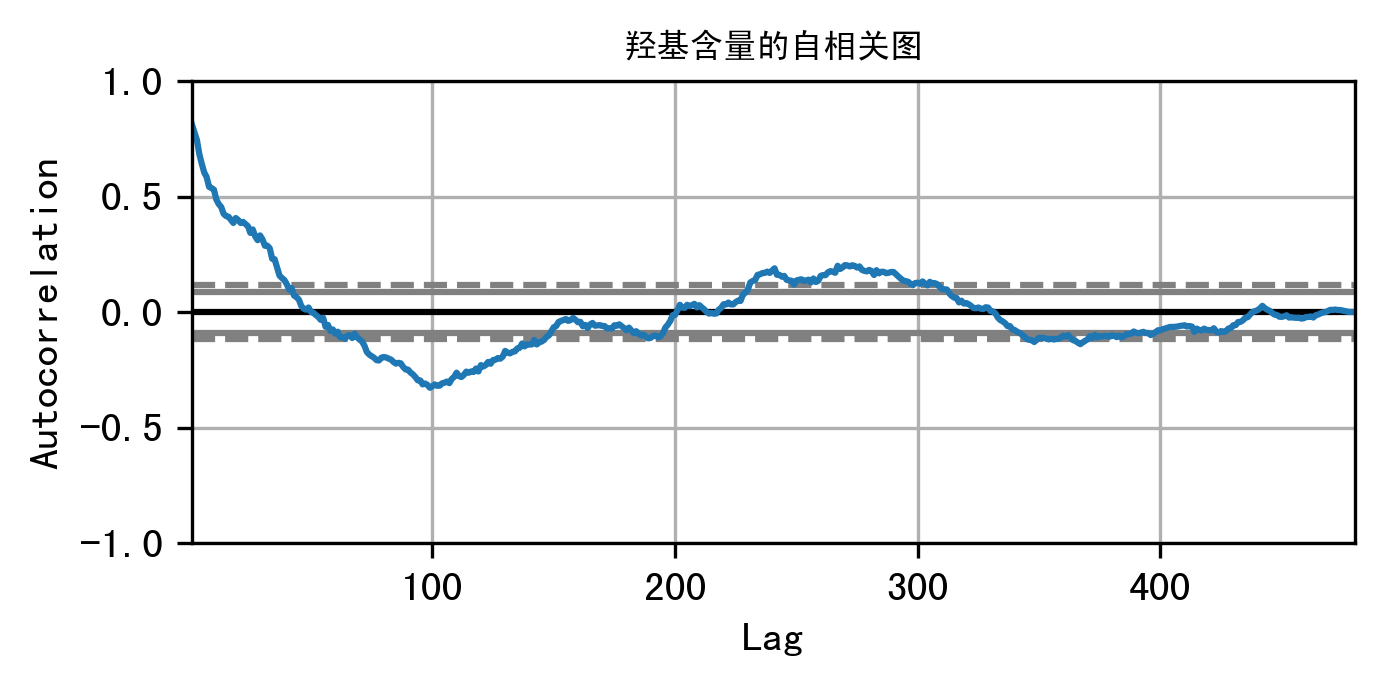

In [76]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
# 用来正常显示中文标签 
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号 
plt.rcParams['axes.unicode_minus']=False
# 绘制条形图
plt.figure(figsize=(5, 2), dpi =300 )
y1 = data["羟基含量"]
y2 = data["羟基含量"]- ((data["羟基含量"]).mean())
autocorrelation_plot(y2)
plt.title('羟基含量的自相关图',fontsize=8)#标题，并设定字号大小
plt.show()


In [79]:
fr


Test Statistic            0.458453
p-value                   0.051960
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
